In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [3]:
#understanding the dataset
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#accessing the data attributes
dataset = boston.data
for name, index in enumerate(boston.feature_names):
    print(index, name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [38]:
#reshaping the data(506,)to(506,1)
data = dataset[:,4].reshape(-1,1)

In [40]:
#shape of the data
np.shape(dataset)

(506, 13)

In [41]:
#target value
target = boston.target.reshape(-1,1)

In [42]:
np.shape(target)

(506, 1)

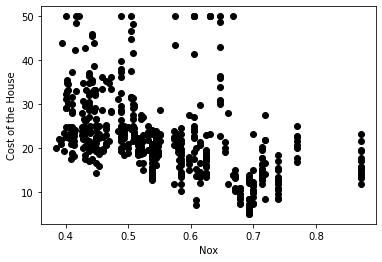

In [43]:
#ensuring that matplotlib works inside the notebook
%matplotlib inline
plt.scatter(data, target, color='black')
plt.xlabel('Nox')
plt.ylabel('Cost of the House')
plt.show()

In [44]:
#creating the regression model
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Laso
#from sklearn.linear_model import Ridge
reg =LinearRegression()
#fit the model
reg.fit(data, target)

LinearRegression()

In [45]:
#prediction
pred = reg.predict(data)

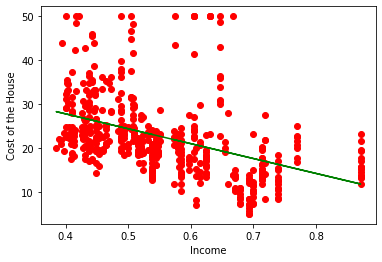

In [46]:
%matplotlib inline
plt.scatter(data, target, color='red')
plt.plot(data, pred, color='green')
plt.xlabel('Income')
plt.ylabel('Cost of the House')
plt.show()

In [47]:
#circumventing the curve issue using the polynomial model
from sklearn.preprocessing import PolynomialFeatures

#to allow merging of models
from sklearn.pipeline import make_pipeline

In [98]:
model = make_pipeline(PolynomialFeatures(20), reg)

In [99]:
model.fit(data, target)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=20)),
                ('linearregression', LinearRegression())])

In [100]:
pred = model.predict(data)

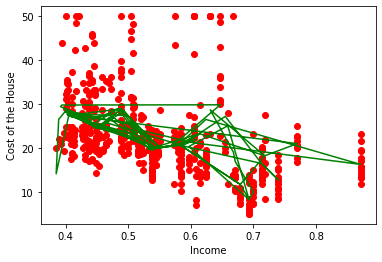

In [101]:
#ensuring that matplotlib works inside the notebook
%matplotlib inline
plt.scatter(data, target, color='red')
plt.plot(data, pred, color='green')
plt.xlabel('Income')
plt.ylabel('Cost of the House')
plt.show()

In [102]:
#r^2 metric
from sklearn.metrics import r2_score

In [103]:
#to predict using r square
r2_score(pred,target)

-0.9151719561268759